Testing methods for worksheet 2

In [2]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from playsound import playsound

Load Audio

[=] Mono Channel !!
<class 'numpy.ndarray'>
size of input response : 507
size of impulse response : 582
input sequence : [-3.3000e+02  1.9370e+03  1.1330e+03  2.0060e+03 -8.1200e+02  2.5360e+03
  1.2990e+03 -2.3750e+03  9.3000e+01  1.2490e+03 -2.3100e+02 -2.0740e+03
  1.2700e+02  1.1720e+03  1.0920e+03  1.3700e+02 -7.7000e+02  1.0800e+02
  9.2300e+02  1.3570e+03  5.6400e+02  1.2250e+03 -1.0290e+03 -4.1100e+02
 -5.3500e+02 -1.7240e+03 -2.0140e+03  4.2600e+02  8.9900e+02  2.2400e+02
 -2.0790e+03 -8.8600e+02  2.9700e+02 -2.6400e+02  1.8260e+03  1.6200e+02
 -4.3100e+02  1.5460e+03  5.9500e+02 -3.5600e+03  5.1000e+01 -1.2720e+03
 -5.7400e+02  1.4600e+02 -1.3850e+03 -1.0880e+03 -9.4000e+01  8.7000e+01
  1.1270e+03 -2.8140e+03 -3.3200e+02 -6.0000e+00  6.9400e+02 -9.1200e+02
 -3.5900e+02  7.2300e+02 -5.3000e+02  7.0400e+02  1.9910e+03 -2.0410e+03
 -7.4700e+02 -2.4320e+03 -3.7260e+03  1.8060e+03 -3.9990e+03  4.9470e+03
 -1.2480e+03 -5.4000e+01 -2.3620e+03  3.4590e+03  1.7600e+02  9.9200e+02
 -2

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

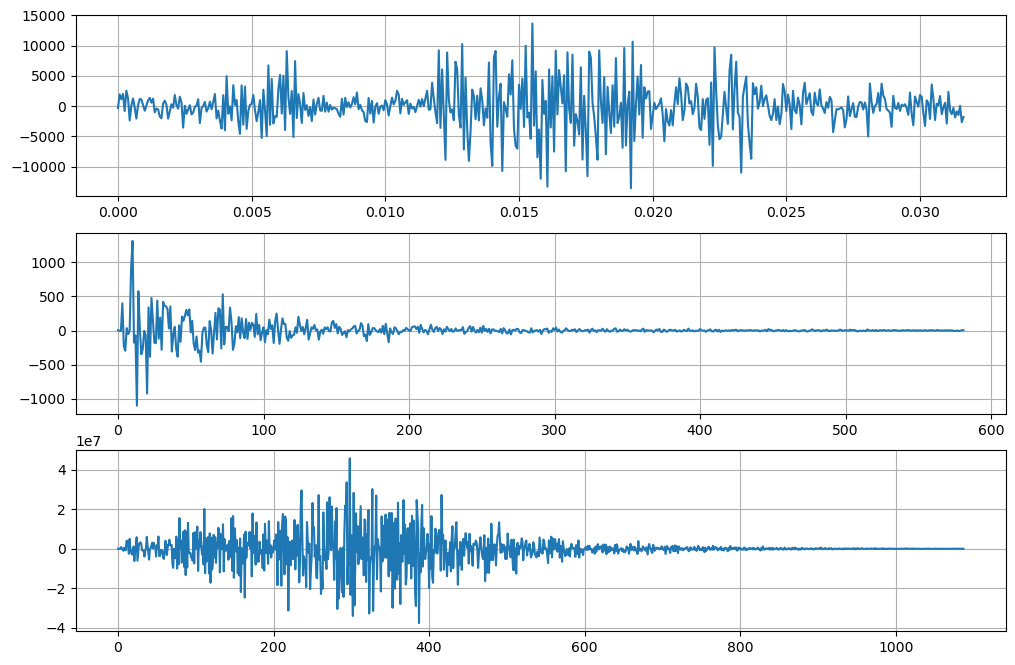

In [24]:
Ix = 0  #starting index of input response
Ih = 0  #starting index of impulse response

file_name_x = 'mono.wav'
file_name_h = 'hallway_imp.wav'
Fsx, x = read(file_name_x)
Fsh, h = read(file_name_h)

if len(x.shape) == 2:
    print('[=] Stereo Channel !!')
elif len(x.shape) == 1:
    print('[=] Mono Channel !!')
print(type(x))

# x_lch = x_lch.astype(np.float64)
# x_rch = x_rch.astype(np.float64)
# h = h.astype(np.float64)
interval = max(len(x) // 500, 1)
x = x[::interval]
h = h[::interval]

# Cast to np.float64 to handle overflow
x = x.astype(np.float64)
h = h.astype(np.float64)

N = x.size
Tsx = 1/Fsx
tx = np.arange(N)*Tsx

Lx = len(x) #length of input response
Lh = len(h) #length of impulse response

print('size of input response : {}'.format(Lx))
print('size of impulse response : {}'.format(Lh))

Iy = Ix + Ih #starting index of output response
Ly = Lx + Lh - 1 #length of output response

y = np.zeros(Ly, dtype=np.float64)

# Limit the range for debugging purposes
# Lx_limit = 100
# Lh_limit = 100

for i in range(Lx):
    for j in range(Lh):
        y[i + j] += x[i] * h[j]


# # print('')
# print('[=] Sampling Rate {} Hz'.format(Fsx))


# print('Voice numpy array {}'.format(x))

# delF = 0.732
# print('Sampling Frequency of input response : {}'.format(Fsx))
# Nx = int(Fsx/delF)
# print('Number of sample points (input response) : {}'.format(Nx))


print("input sequence : {}".format(x))
print("IR sequence : {}".format(h))
print("Output sequence : {}".format(y))

nx = np.arange(Ix,Ix + Lx)      #bringing all the responses to equal sampling distance
nh = np.arange(Ih,Ih + Lh)
ny = np.arange(Iy,Iy + Ly)

plt.figure(figsize = (12,8))

plt.subplot(3,1,1)
plt.plot(tx,x)
# plt.xlim([min(ny) - 1, max(ny) + 1])        #setting the limit for x-axis
# plt.ylim([-5,5])
plt.grid()

plt.subplot(3,1,2)
plt.plot(nh,h)
# plt.xlim([min(ny) - 1, max(ny) + 1])
plt.grid()

plt.subplot(3,1,3)
#plt.stem(ny,y)
plt.plot(ny,y)
# plt.xlim([min(ny) - 1, max(ny) + 1])
# plt.ylim([-5,5])
plt.grid()

plt.tight_layout
# plt.show()

Read channel data

In [20]:
data_lch = data[:,0]
data_rch = data[:,1]

N = data_lch.size
Ts = 1/Fs
t = np.arange(N)*Ts

Plot Data

<function matplotlib.pyplot.show(close=None, block=None)>

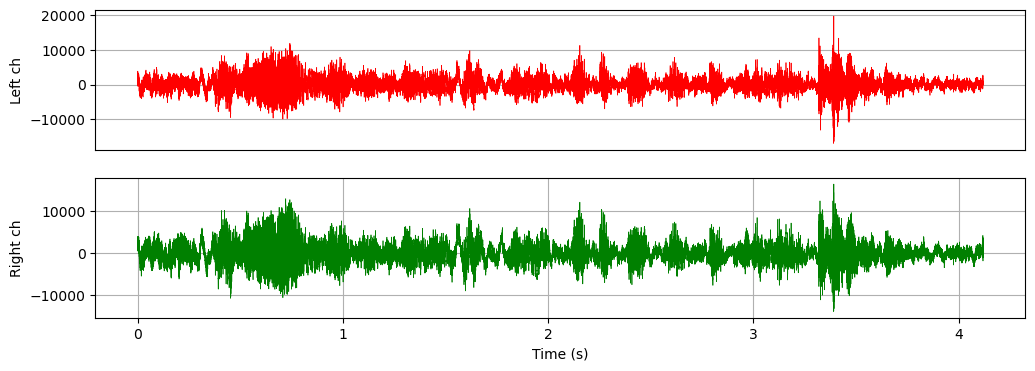

In [32]:
plt.figure(figsize = (12,4))

plt.subplot(2,1,1)
plt.plot(t,data_lch,color = 'r', linewidth = 0.5)
plt.xticks(ticks=[])
plt.ylabel('Left ch')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t,data_rch, color = 'g',linewidth = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('Right ch')
plt.grid()

plt.show

Playback The Sound

In [27]:
# for playing note.wav file
playsound('My_voice.wav')
print('Sound played successfully')


Sound played successfully


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio files
file_name_x = 'audio1.wav'  # Replace with the correct file path
file_name_h = 'audio2.wav'  # Replace with the correct file path

# Read the audio files
Fsx, x = wavfile.read(file_name_x)
Fsh, h = wavfile.read(file_name_h)

# Ensure the audio files have the same sampling rate
assert Fsx == Fsh, "Sampling rates of the audio files must match"

# Ensure both audio files are mono
assert len(x.shape) == 1 and len(h.shape) == 1, "Both audio files must be mono"

# Perform linear convolution
y = np.convolve(x, h, mode='full')

# Save the convolved audio to a new file
convolved_file_name = 'convolved_audio.wav'
wavfile.write(convolved_file_name, Fsx, y.astype(np.int16))  # Save as 16-bit PCM

# Plot the original and convoluted signals
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(x)
plt.title('Audio Signal 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(h)
plt.title('Audio Signal 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(y)
plt.title('Convoluted Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

print("Convolution completed. Convolved audio saved as", convolved_file_name)


AssertionError: Both audio files must be mono